In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner

import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

In [2]:
post_header= [
    'log10(m_b/m_star)',
    'm_c/m_star',
    'lambda_c',
    'P_c',
    'e_b',
    'e_c',
    'varpi_b',
    'varpi_c',
    'b_c',
    'Omega_c-Omega_b',
    'P_b',
    'delta_t',
    'log_likelihood']

post = pd.read_csv('zwift-post_equal_weights.dat', sep='    ', names=post_header, index_col=False)

neworder= [
    'log10(m_b/m_star)',
    'm_c/m_star',
    'delta_t',
    'lambda_c',
    'P_b',
    'P_c',
    'e_b',
    'e_c',
    'varpi_b',
    'varpi_c',
    'b_c',
    'Omega_c-Omega_b',
    'log_likelihood']
post=post.reindex(columns=neworder)


post['delta_t'] += 277
post

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,log10(m_b/m_star),m_c/m_star,delta_t,lambda_c,P_b,P_c,e_b,e_c,varpi_b,varpi_c,b_c,Omega_c-Omega_b,log_likelihood
0,-4.157374,0.000262,277.505506,341.368068,160.884683,838.105519,0.336080,0.121773,87.752017,77.534619,100.429156,133.702234,45.044091
1,-4.232727,0.000189,277.505841,4.176982,160.889738,841.378613,0.542009,0.105228,133.184206,118.705990,26.388808,345.654610,45.516219
2,-3.742485,0.000170,277.504531,357.584123,160.884527,873.292589,0.416813,0.182686,88.464283,91.957901,7.226780,5.097080,46.006617
3,-3.849361,0.000151,277.504497,13.835233,160.884876,865.988741,0.677838,0.201234,97.172712,99.969249,98.438886,189.292896,47.264500
4,-3.756278,0.000251,277.506008,355.438150,160.889086,834.551962,0.467376,0.091275,117.056933,94.259024,107.914532,15.167185,47.510166
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29977,-3.453607,0.000230,277.505325,350.007135,160.885151,842.661359,0.419078,0.133384,105.402675,86.872698,175.559866,158.037885,62.691410
29978,-3.835630,0.000252,277.505735,351.942743,160.885368,844.162767,0.415757,0.132552,111.202441,86.837902,180.732665,155.170155,61.800376
29979,-3.534113,0.000310,277.505568,346.427095,160.885503,843.185452,0.314673,0.117058,107.990926,84.166412,180.476428,171.581739,61.523892
29980,-3.637675,0.000197,277.505475,351.756657,160.885255,840.858857,0.511531,0.131137,109.131816,94.802586,196.147764,157.946405,61.253815


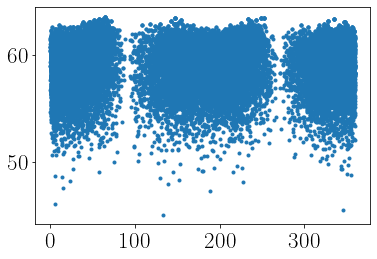

In [3]:
plt.plot(post['Omega_c-Omega_b'], post['log_likelihood'], '.')





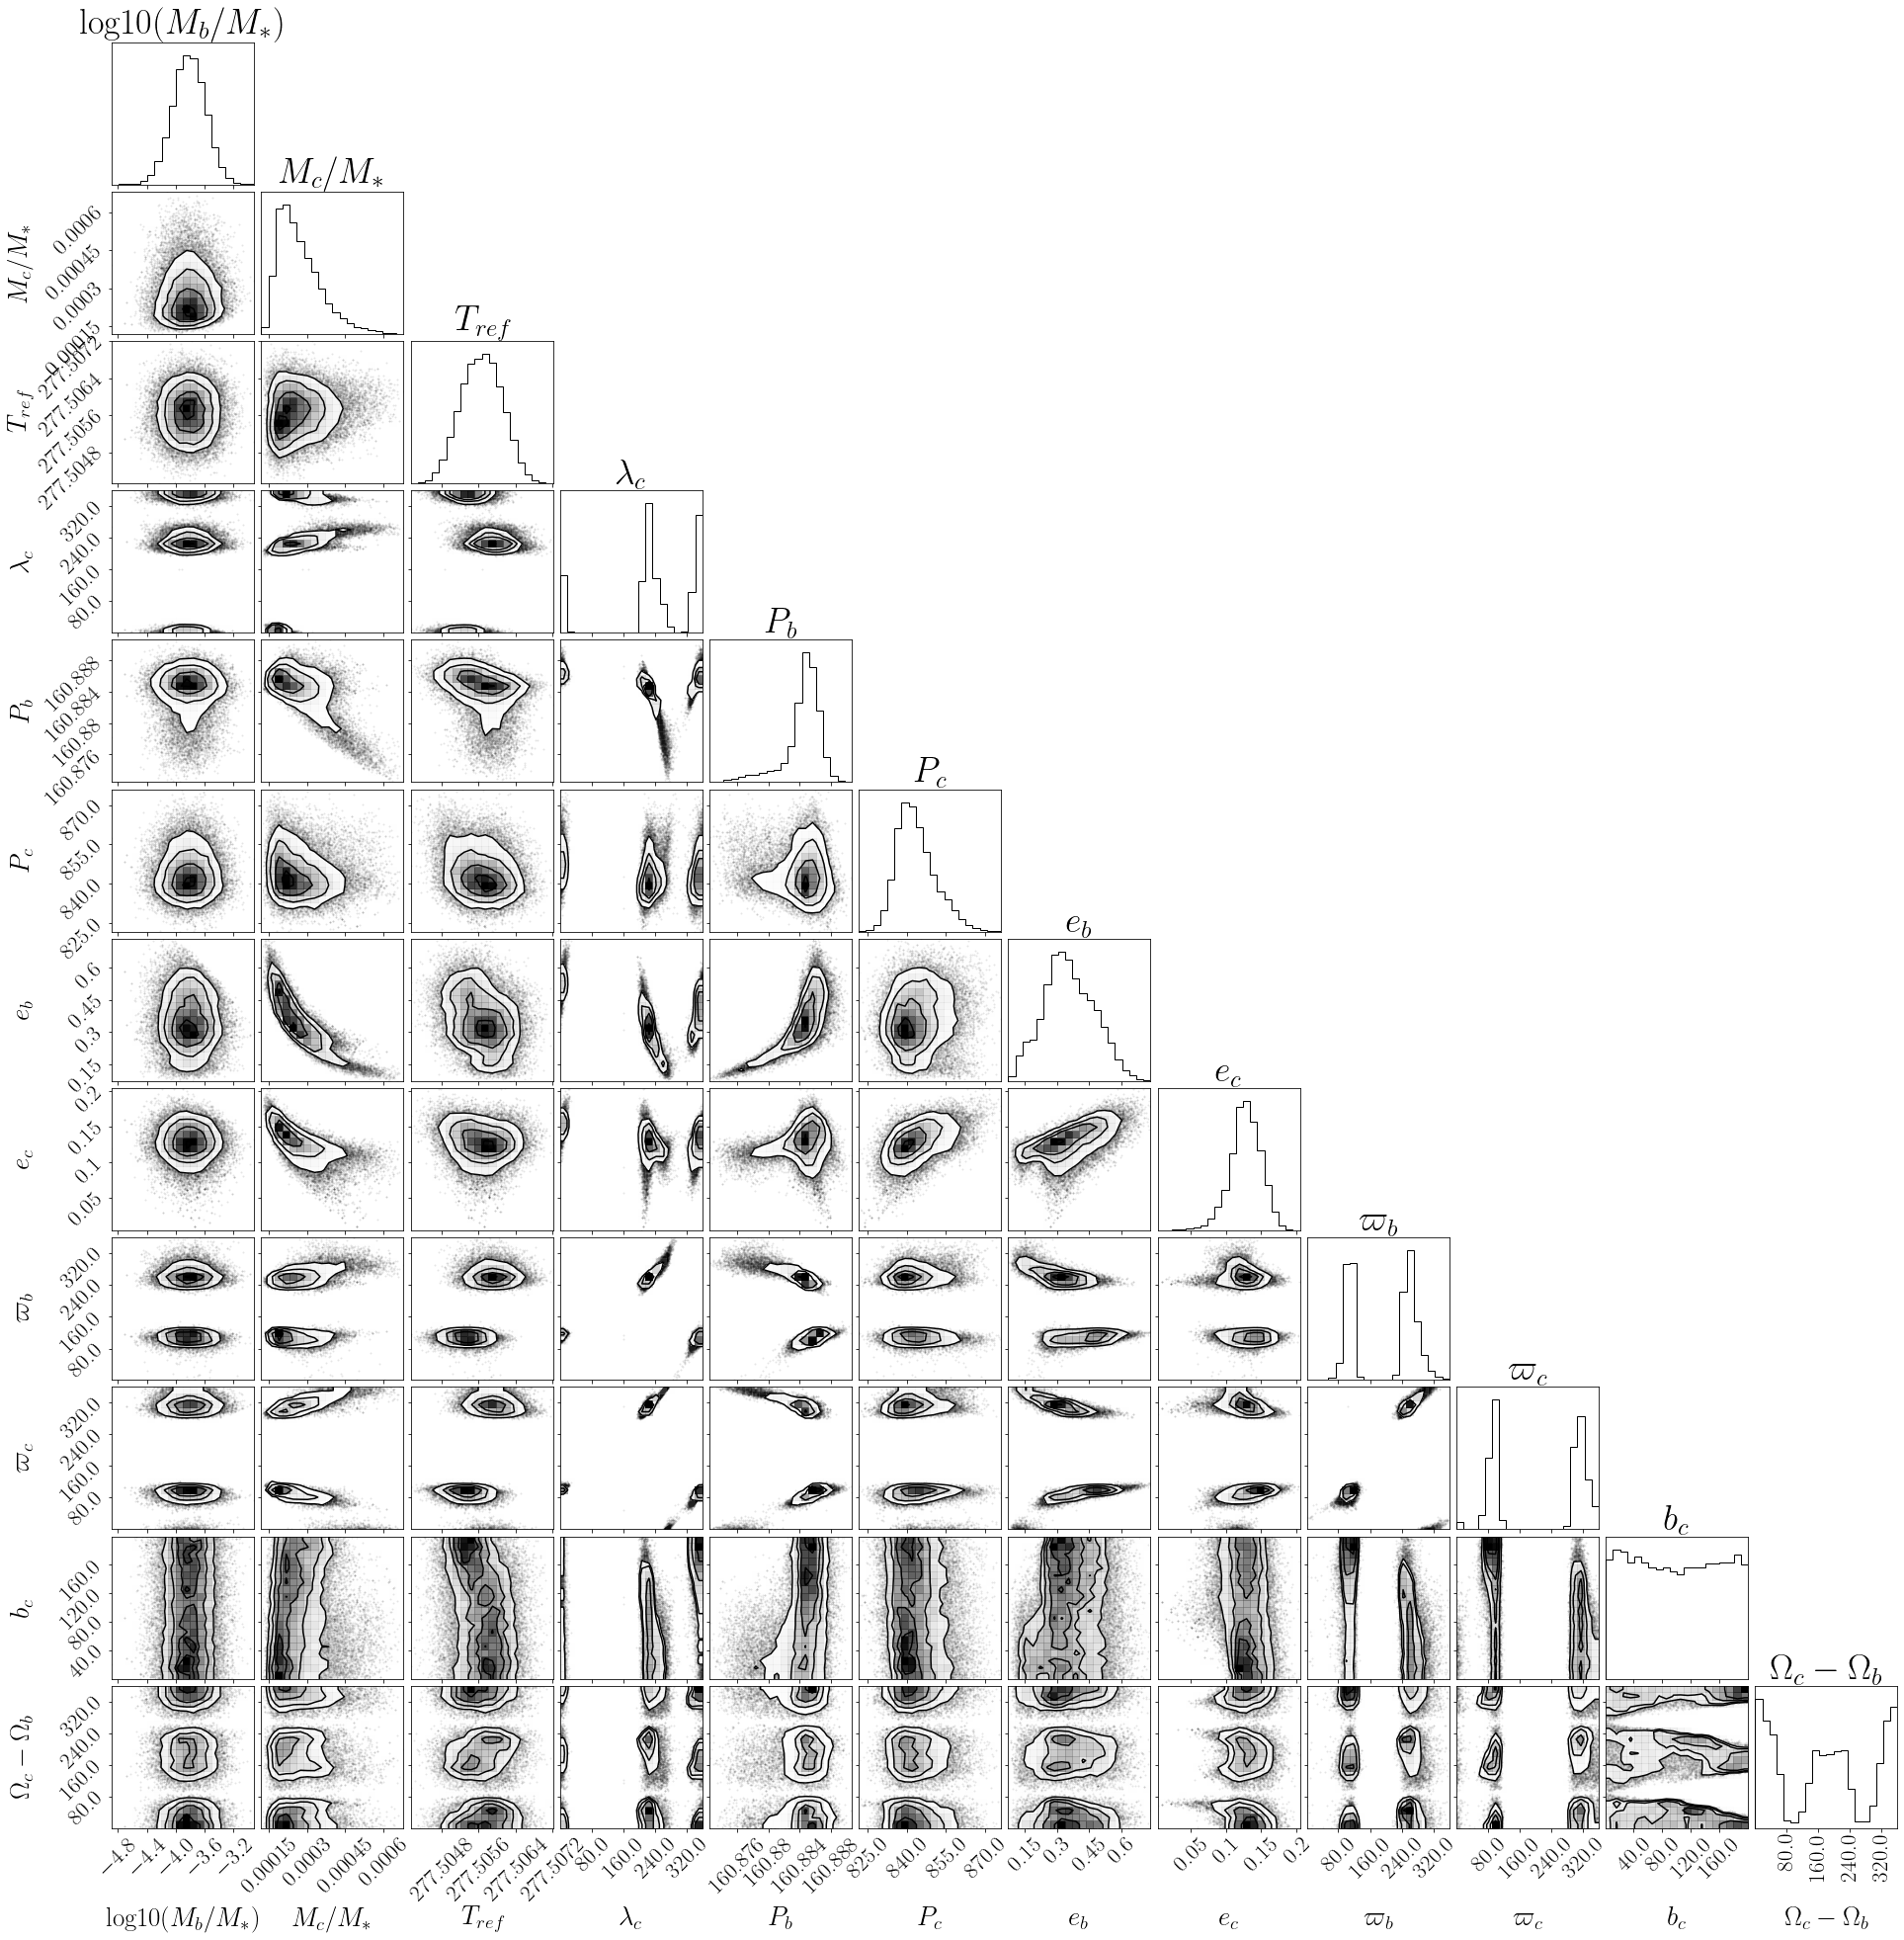

In [4]:
post_labels= [
    r'log10($M_b$/$M_*$)',
    r'$M_c$/$M_*$',
    r'$T_{ref}$',
    r'$\lambda_c$',
    r'$P_b$',
    r'$P_c$',
    r'$e_b$',
    r'$e_c$',
    r'$\varpi_b$',
    r'$\varpi_c$',
    r'$b_c$',
    r'$\Omega_c-\Omega_b$',
    r'log(likelihood)']


post_corner = post.iloc[:, :-1]

fig = corner.corner(post_corner, labels = post_labels[:-1], show_titles=True, title_kwargs={'fontsize': 36},
                    label_kwargs={'fontsize': 27}, labelpad=0.25, title_fmt=None)

ax_list = fig.axes
for ax in ax_list:
    try:
        ax.ticklabel_format(useOffset=False)
    except:
        AttributeError

#this just cleans up labels, removing annoying scientific notation offset
count = 0
for ax in fig.get_axes():
    if count % 12 == 0:
        ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))

    
    if count > len(fig.get_axes())-12:
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))
    count+=1

plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig('swift_corner.pdf', bbox_inches='tight')
plt.show()


In [5]:
condition1 = post['varpi_c'] > 200
condition2 = post['Omega_c-Omega_b'] < 270
condition3 = post['Omega_c-Omega_b'] > 90
post_final_mode2 = post.loc[(condition1) & (condition2) & (condition3)]

condition4 = post['Omega_c-Omega_b'] > 270
condition5 = post['Omega_c-Omega_b'] < 90
post_final_mode1 = post.loc[(condition1) & ((condition4) | (condition5))]


print(len(post))
print(len(post_final_mode2))
print(len(post_final_mode1))


29982
6381
9766


In [6]:
post_final_mode1[:-1]

,log10(m_b/m_star),m_c/m_star,delta_t,lambda_c,P_b,P_c,e_b,e_c,varpi_b,varpi_c,b_c,Omega_c-Omega_b,log_likelihood
7,-3.853351,0.000156,277.506642,223.975365,160.883930,856.644411,0.489444,0.174637,271.703724,303.810684,10.178692,22.681229,48.235024
12,-3.590860,0.000233,277.505859,236.648520,160.883088,848.566877,0.266758,0.119231,267.949835,326.531228,21.495060,355.071779,48.775795
16,-3.949138,0.000272,277.505166,225.613932,160.884796,839.041917,0.362716,0.090165,265.494423,330.590385,112.625380,57.869173,49.063404
20,-3.836620,0.000355,277.506519,241.303891,160.882026,855.419809,0.203801,0.114927,278.813995,332.115470,76.441174,26.252289,49.288431
27,-3.399979,0.000168,277.507059,199.339994,160.885325,835.487870,0.432582,0.144108,250.607457,287.853776,113.375905,351.367309,49.729196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,-3.801119,0.000380,277.505559,230.960852,160.884815,840.644621,0.273549,0.069844,272.322457,338.982080,30.694804,81.278226,62.368009
25938,-3.767999,0.000327,277.505767,221.937741,160.885064,834.117085,0.309379,0.068186,260.746108,318.568522,106.072989,57.334441,61.353955
25939,-3.925854,0.000419,277.505132,216.934477,160.886458,835.679351,0.291513,0.040634,245.332440,313.529265,90.157914,63.640524,62.217154
25940,-3.570182,0.000390,277.505952,208.501214,160.887523,822.896234,0.318314,0.032394,249.913401,298.058973,103.901605,60.263581,61.721814


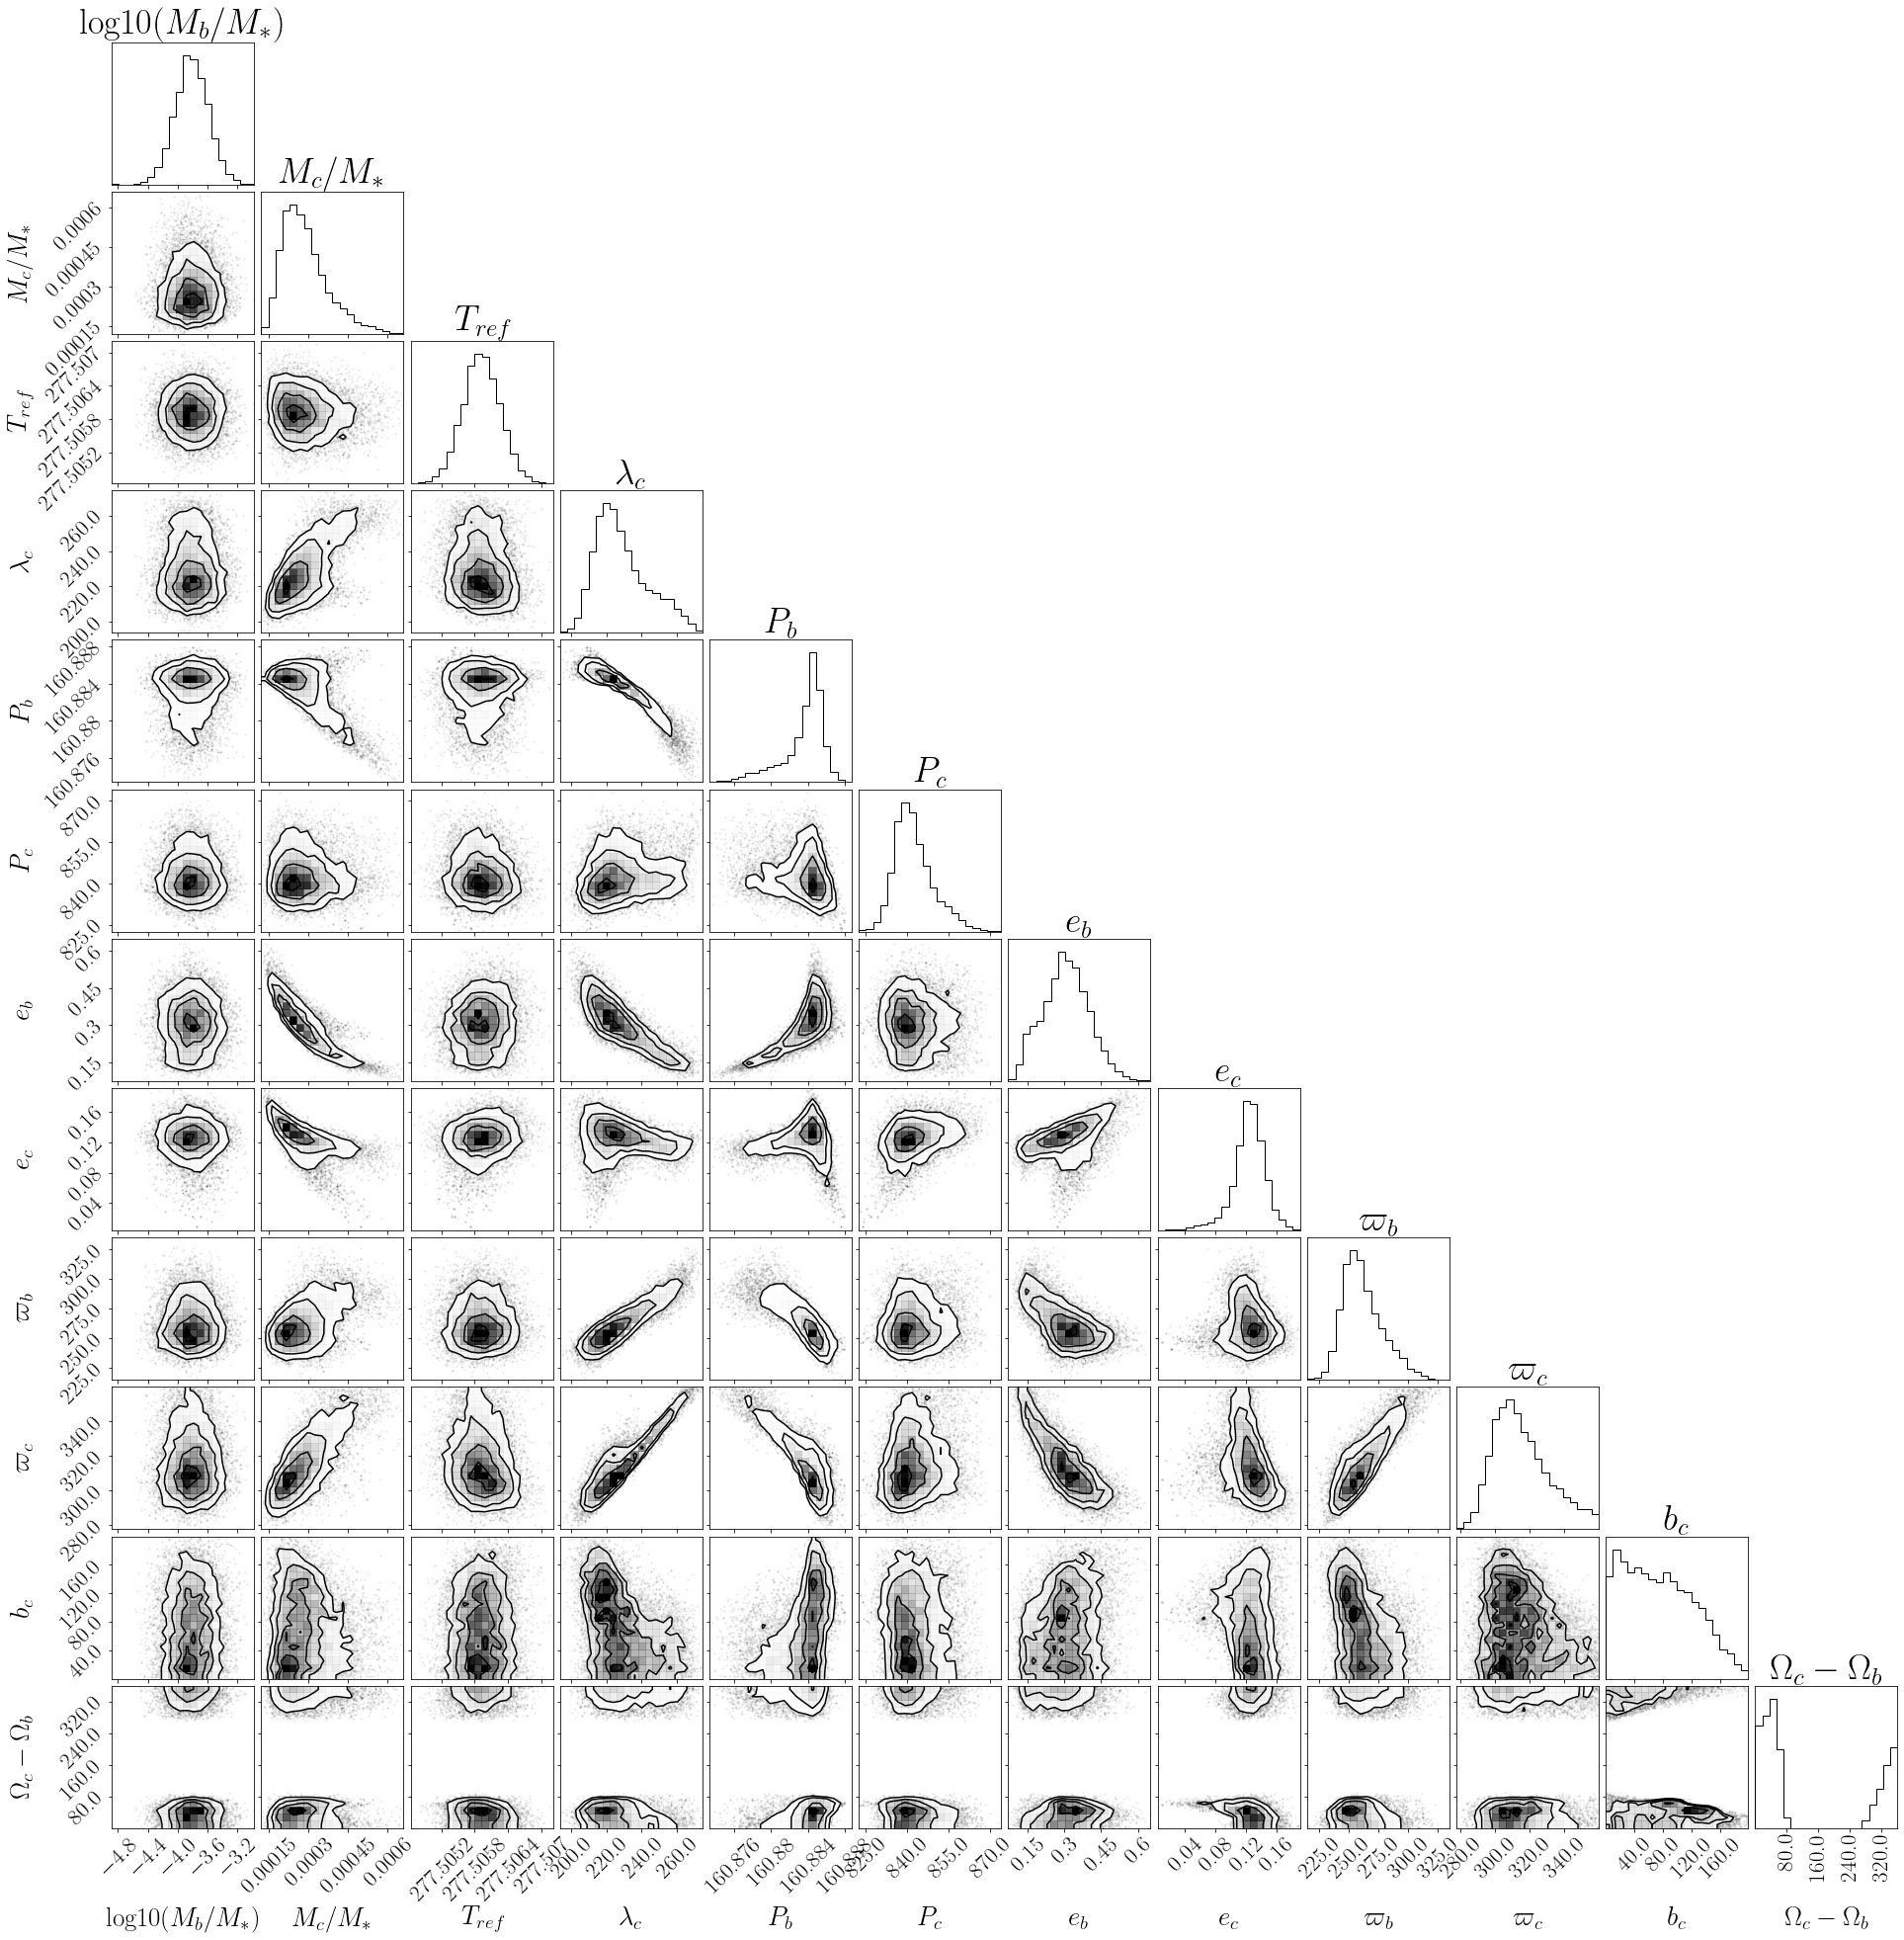

In [7]:
post_labels= [
    r'log10($M_b$/$M_*$)',
    r'$M_c$/$M_*$',
    r'$T_{ref}$',
    r'$\lambda_c$',
    r'$P_b$',
    r'$P_c$',
    r'$e_b$',
    r'$e_c$',
    r'$\varpi_b$',
    r'$\varpi_c$',
    r'$b_c$',
    r'$\Omega_c-\Omega_b$',
    r'log(likelihood)']

post_final_mode1_corner = post_final_mode1.iloc[:, :-1]

fig = corner.corner(post_final_mode1_corner, labels = post_labels[:-1], show_titles=True, title_kwargs={'fontsize': 36},
                    label_kwargs={'fontsize': 27}, labelpad=0.25, title_fmt=None)

ax_list = fig.axes
for ax in ax_list:
    try:
        ax.ticklabel_format(useOffset=False)
    except:
        AttributeError
        
        
        
#this just cleans up labels, removing annoying scientific notation offset
count = 0
for ax in fig.get_axes():
    if count % 12 == 0:
        ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))

    
    if count > len(fig.get_axes())-12:
        ax.get_xaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(np.round(x,5), ',')))
    count+=1

    
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees

plt.savefig('swift_corner_1mode.pdf', bbox_inches='tight')
plt.show()


In [8]:
headers = neworder[:-1]

In [9]:
for label in headers:
    print(post_final_mode1[label].std())
    ''
    print(label, post_final_mode1[label].median(), post_final_mode1[label].std())


0.22409366123670335
log10(m_b/m_star) -3.810469136409721 0.22409366123670335
8.696711651753299e-05
m_c/m_star 0.00027008006466902037 8.696711651753299e-05
0.0003362064383243158
delta_t 277.5059144677113 0.0003362064383243158
15.003488677436215
lambda_c 225.84877371667065 15.003488677436215
0.0023095203221496926
P_b 160.88419524445357 0.0023095203221496926
7.119488680427478
P_c 841.4150429354565 7.119488680427478
0.09263012588133802
e_b 0.30559854532508174 0.09263012588133802
0.022067922443301066
e_c 0.12523263178466998 0.022067922443301066
16.913753130261952
varpi_b 258.9527335835921 16.913753130261952
16.312714148824806
varpi_c 312.7198658495407 16.312714148824806
47.80313711257423
b_c 72.07645803836684 47.80313711257423
140.53712148603648
Omega_c-Omega_b 51.26457658900999 140.53712148603648


In [10]:
import pycircstat
import numpy as np

angles = post_final_mode1['Omega_c-Omega_b']
# Assuming your wrapped angles are stored in a NumPy array called 'angles'
# Convert angles to radians
angles_rad = np.deg2rad(angles)

# Calculate the circular median
median_angle = pycircstat.descriptive.median(angles_rad)

# Calculate the circular standard deviation
std_angle = pycircstat.descriptive.std(angles_rad)

# Convert the median angle and std deviation back to degrees
median_angle_deg = np.rad2deg(median_angle)
std_angle_deg = np.rad2deg(std_angle)

# Wrap the median angle within 0-360 degrees
median_angle_deg_wrapped = median_angle_deg % 360

# Print the results
print("Median Angle: {:.2f} degrees (wrapped)".format(median_angle_deg_wrapped))
print("Standard Deviation: {:.2f} degrees".format(std_angle_deg))


Median Angle: 19.52 degrees (wrapped)
Standard Deviation: 36.89 degrees


In [11]:
for label in headers:
    print(label, post_final_mode2[label].median(), post_final_mode2[label].std())


log10(m_b/m_star) -3.817545983370299 0.2322920018006159
m_c/m_star 0.0002679804280923664 8.321709856554257e-05
delta_t 277.505919839094 0.0003365627441888693
lambda_c 225.2962296997332 15.153583700948131
P_b 160.8842589296698 0.0022877704891410685
P_c 841.4100759813259 6.873997348194581
e_b 0.3100739341750954 0.09405759553247021
e_c 0.1244135829057974 0.01898795598832857
varpi_b 258.3743362965083 16.92674517656498
varpi_c 313.0890832820001 16.23818037492849
b_c 71.9492832123964 48.24490676805818
Omega_c-Omega_b 207.5546593938074 37.04787276152735


In [12]:
# Find the index of the row with the maximum 'log_likelihood'
max_posterior_index = post_final_mode1['log_likelihood'].idxmax()

# Retrieve the row with the maximum 'log_likelihood'
max_posterior_row = post_final_mode1.loc[max_posterior_index].copy()

max_posterior_row['delta_t'] -= 277.

print(max_posterior_row)
# Print the row with the maximum 'log_likelihood'
for post in max_posterior_row:
    print(post)

log10(m_b/m_star)     -3.605364
m_c/m_star             0.000407
delta_t                0.505544
lambda_c             219.084449
P_b                  160.886201
P_c                  840.135129
e_b                    0.281093
e_c                    0.061912
varpi_b              247.320774
varpi_c              319.478533
b_c                   84.446026
Omega_c-Omega_b       65.062806
log_likelihood        63.593570
Name: 25787, dtype: float64
-3.605364083707173
0.0004069773677970758
0.5055442808018142
219.0844492059052
160.8862008615245
840.1351293262094
0.2810927710692524
0.06191226886942466
247.3207737447071
319.4785327098633
84.44602619884041
65.06280631051585
63.59357006518407


In [13]:
import pandas as pd

# Assuming your DataFrame is named 'df'
medians = post_final_mode1.median()
std_devs = post_final_mode1.std()

print(std_devs)
# Create a new DataFrame with the combined rounded median and standard deviation
summary_df = pd.DataFrame({'Value': medians.astype(str) + ' $\pm$ ' + std_devs.astype(str)})

# Convert the summary DataFrame to a LaTeX table
latex_table = summary_df.to_latex(header=False, index=False, escape=False)

# Print or save the LaTeX table
print(latex_table)

log10(m_b/m_star)      0.224094
m_c/m_star             0.000087
delta_t                0.000336
lambda_c              15.003489
P_b                    0.002310
P_c                    7.119489
e_b                    0.092630
e_c                    0.022068
varpi_b               16.913753
varpi_c               16.312714
b_c                   47.803137
Omega_c-Omega_b      140.537121
log_likelihood         2.117434
dtype: float64
\begin{tabular}{l}
\toprule
      -3.810469136409721 $\pm$ 0.22409366123670335 \\
0.00027008006466902037 $\pm$ 8.696711651753299e-05 \\
     277.5059144677113 $\pm$ 0.0003362064383243158 \\
       225.84877371667065 $\pm$ 15.003488677436215 \\
    160.88419524445357 $\pm$ 0.0023095203221496926 \\
         841.4150429354565 $\pm$ 7.119488680427478 \\
     0.30559854532508174 $\pm$ 0.09263012588133802 \\
    0.12523263178466998 $\pm$ 0.022067922443301066 \\
        258.9527335835921 $\pm$ 16.913753130261952 \\
        312.7198658495407 $\pm$ 16.312714148824806 \\
 

In [14]:
from astropy.constants import M_sun, M_jup
mstar = 0.94 #msun
mstar_to_mjup = M_sun/M_jup


mc = post_final_mode1['m_c/m_star']*mstar*mstar_to_mjup
print('mc', np.median(mc), np.std(mc))


mc 0.26595096822786507 0.08563314245756873


In [15]:
m_b_m_star = 10**(post_final_mode1['log10(m_b/m_star)'])
print('m_b_m_star', np.median(m_b_m_star), np.std(m_b_m_star))

mb = m_b_m_star*mstar*mstar_to_mjup
print('mb', np.median(mb), np.std(mb))



m_b_m_star 0.0001547144462297764 9.764764514374928e-05
mb 0.1523491073807 0.0961547673019714


# test RV signal

In [16]:
from astropy.constants import G, R_sun

def rv_semi_amplitude(P, e, mp, mstar, i):
    
    first_term = (((2 * np.pi * G) / P) ** (1/3))
    second_term = ((mp*np.sin(i))/((mp+mstar)**(2/3)))
    third_term = (1 / (np.sqrt(1-e**2)))
    
    K = first_term * second_term * third_term
    
    return K
                                          
                                          
                                          
                                          
                                          
                                          
                                          

In [17]:
def get_inclination(a, b, rstar):
    inc = np.arccos( b * (rstar / a))
    
    return inc

In [18]:
def get_semi_major_axis(period, mp, mstar, ecc):
    a_third = ((G * (mp+mstar) * (period**2.)) / (4 * (np.pi**2.))) 
    a = a_third ** (1./3.)
    
    a_w_ecc = a / np.sqrt(1 - ecc**2.)
    
    return a_w_ecc



In [19]:
import astropy.units as u
mstar = 0.94 * M_sun
rstar = 0.95 * R_sun

m_b_m_star = 10**(post_final_mode1['log10(m_b/m_star)'])
mb = m_b_m_star*mstar

m_c_m_star = post_final_mode1['m_c/m_star']
mc = m_c_m_star*mstar

eb = post_final_mode1['e_b']
ec = post_final_mode1['e_c']

bb = 0.107
bc = post_final_mode1['b_c']

Pb = post_final_mode1['P_b'] * u.d.to('second') * u.s
Pc = post_final_mode1['P_c'] * u.d.to('second') * u.s



In [20]:
ab = get_semi_major_axis(Pb, mb, mstar, eb)
ib = get_inclination(ab, bb, rstar)
Kb = rv_semi_amplitude(Pb, eb, mb, mstar, ib)

print(r'i_b = ', np.degrees(np.median(ib)), np.degrees(np.std(ib)))
print(r'K_b = ', np.median(Kb), np.std(Kb))



ac = get_semi_major_axis(Pc, mc, mstar, ec)
ic = get_inclination(ac, bc, rstar)
Kc = rv_semi_amplitude(Pc, ec, mc, mstar, ic)

print(r'i_c = ', np.degrees(np.median(ic)), np.degrees(np.std(ic)))
print(r'K_c = ', np.median(Kc), np.std(Kc))


i_b =  89.95452577568264 0.0015130500177240067
K_b =  6.273377612225356 3.950275210914396
i_c =  79.35868389986972 7.232871915923578
K_c =  5.816471117428446 1.9032073152413262


In [21]:
# make sure our equations are right by comparing to results from Yahalomi et al. 2019
# https://iopscience.iop.org/article/10.3847/1538-4357/ab2649

Ptest = 88.18052 * u.d.to('second') * u.s
m1test = 0.955*M_sun
m2test = 0.5392*M_sun

btest = 0.680
R1test = 0.89*R_sun

etest =  0.0168

atest = get_semi_major_axis(Ptest, m1test, m2test, etest)
print(atest.to('AU'))
itest = get_inclination(atest, btest, R1test)
print(itest.to('deg'))
Kb = rv_semi_amplitude(Ptest, etest, m2test, m1test, itest)
print(Kb)


0.4433162926817453 AU
89.63624634332227 deg
19736.26528839856 m / s


# now test astrometric signal

In [22]:
def get_astrometric_signal(period, mp, ms, ecc, distance):
    a_p = get_semi_major_axis(period, mp, ms, ecc)
    a_p_au = a_p.to(u.au)

    a_s = a_p * (mp / ms)
    a_s_au = a_s.to(u.au)
    
    #use small angle approx to return astrom signal in microarcseconds
    return (a_s_au/distance).value * 10**6.

    

In [23]:
from astropy import units as u

#parallax [mas] = 2.8446 [0.0134] A 2020yCat.1350....0G
distance = (1/0.0028446 * u.parsec)
mstar_array = np.full_like(mb.values * u.kg, mstar)
theta_b = get_astrometric_signal(Pb.values, 
                                 mb.values * u.kg, 
                                 mstar_array, 
                                 eb.values, 
                                 distance * u.pc)
theta_c = get_astrometric_signal(Pc.values, 
                                 mc.values * u.kg, 
                                 mstar_array, 
                                 ec.values, 
                                 distance * u.pc)

print(r'$\Theta$_b = ', np.median(theta_b), np.std(theta_b), ' microarcseconds')
print(r'$\Theta$_c = ', np.median(theta_c), np.std(theta_c), ' microarcseconds')

thetas = [np.median(theta_b), np.median(theta_c)]
thetas_err = [np.std(theta_b), np.std(theta_c)]


$\Theta$_b =  0.2639493046437029 0.16626387891788222  microarcseconds
$\Theta$_c =  1.3236305568877558 0.42380624070429157  microarcseconds


In [25]:
print(distance)

351.5432749771497 pc


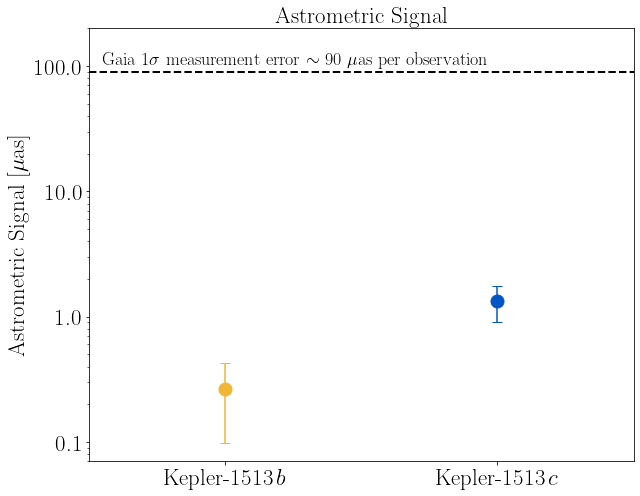

In [24]:
fig, ax = plt.subplots(figsize = [9, 7])
colors = ["#efb734", "#0156c7"]

for ii in range(0, len(thetas)):
    plt.errorbar([1,3][ii], thetas[ii], yerr = thetas_err[ii], color = colors[ii], 
                 ls='', marker='o', ms=13, capsize=5)

plt.yscale('log')

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

plt.ylim(0.07, 200)
plt.xlim(0, 4)
# Remove other x-axis ticks
plt.gca().xaxis.set_ticks([])

# Customize the x-axis ticks
plt.xticks([1, 3], [r'Kepler-1513$\,b$', r'Kepler-1513$\,c$'], rotation = 0)



#from table in appendix here...
#kepler-1513 = G mag 13, so sigma ~ 90
#https://arxiv.org/pdf/1411.1173.pdf
plt.axhline(90, 0, 1, color='k', lw=2, ls='--')
plt.text(0.1, 103, r'Gaia 1$\sigma$ measurement error $\sim$ 90 $\mu$as per observation', fontsize=18, fontweight='bold')



#not sure about roman for further/fainter stars -- also seems unlikely to get time
'''
plt.axhline(5, 0, 1, color='k', lw=2, ls='--')
plt.axhline(20, 0, 1, color='k', lw=2, ls='--')
plt.axhspan(5, 20, 0, 1, color='k', lw=2, alpha=0.3)
plt.text(0.1, 23, r'Roman 1$\sigma$ measurement error $\sim$ 5 to 20 $\mu$as per observation', fontsize=18, fontweight='bold')
'''

plt.xticks(fontsize=23)
plt.yticks(fontsize=23)


plt.title('Astrometric Signal', fontsize = 23)
plt.ylabel(r'Astrometric Signal [$\mu$as]', fontsize = 23)

plt.tight_layout()
plt.savefig('astrometric_signal.pdf')
plt.show()